In [94]:
import tensorflow as tf


In [12]:
!pip install tensorflow-datasets --user



In [13]:
import tensorflow_datasets as tfds

In [14]:
imdb_sentences =[]
imdb_labels=[]

In [15]:
train_data = tfds.as_numpy(tfds.load('imdb_reviews',split='train'))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\DELL\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteSHMT5S\imdb_reviews-train.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\DELL\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteSHMT5S\imdb_reviews-test.t…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\DELL\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteSHMT5S\imdb_reviews-unsupe…

Dataset imdb_reviews downloaded and prepared to C:\Users\DELL\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [16]:
train_data

In [121]:
imdb_sentences =[]
imdb_labels=[]

for item in train_data:
    imdb_sentences.append(str(item['text']))
    imdb_labels.append(item['label'])
    

In [96]:
len(imdb_sentences)

25000

In [122]:
## separation des donnees

training_sentences=imdb_sentences[:20000]
test_sentences=imdb_sentences[20000:]


training_labels =imdb_labels[:20000]
test_labels =imdb_labels[20000:]

In [124]:
print(type(training_sentences))

<class 'list'>


### tokenisation: de phrase en liste de mots

In [100]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [101]:
tokenizer =Tokenizer(num_words=100,oov_token= "<OVV>")

In [102]:
phrases =['je suis au marche','je suis en travail','Je mange du bassi dans la chambre de Issa']

In [103]:
tokenizer.fit_on_texts(phrases)

In [104]:
tokenizer.word_index

{'<OVV>': 1,
 'je': 2,
 'suis': 3,
 'au': 4,
 'marche': 5,
 'en': 6,
 'travail': 7,
 'mange': 8,
 'du': 9,
 'bassi': 10,
 'dans': 11,
 'la': 12,
 'chambre': 13,
 'de': 14,
 'issa': 15}

In [71]:
tokenizer.index_word

{1: '<OVV>',
 2: 'je',
 3: 'suis',
 4: 'je suis au marche',
 5: 'je suis en travail',
 6: 'je mange du bassi dans la chambre de issa',
 7: 'au',
 8: 'marche',
 9: 'en',
 10: 'travail',
 11: 'mange',
 12: 'du',
 13: 'bassi',
 14: 'dans',
 15: 'la',
 16: 'chambre',
 17: 'de',
 18: 'issa'}

In [37]:
### Numerisation  des textes

In [105]:
squ = tokenizer.texts_to_sequences(phrases)

In [106]:
squ

[[2, 3, 4, 5], [2, 3, 6, 7], [2, 8, 9, 10, 11, 12, 13, 14, 15]]

In [54]:
### Padding pour completer les sequences avce des 000000
## et le truncating pour couper une phrase si elle est trop longue

In [107]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [108]:
pad_sequences(squ)

array([[ 0,  0,  0,  0,  0,  2,  3,  4,  5],
       [ 0,  0,  0,  0,  0,  2,  3,  6,  7],
       [ 2,  8,  9, 10, 11, 12, 13, 14, 15]])

In [109]:
pad_sequences(squ,padding='post')

array([[ 2,  3,  4,  5,  0,  0,  0,  0,  0],
       [ 2,  3,  6,  7,  0,  0,  0,  0,  0],
       [ 2,  8,  9, 10, 11, 12, 13, 14, 15]])

In [110]:
pad_sequences(squ,padding='post',maxlen=7)

array([[ 2,  3,  4,  5,  0,  0,  0],
       [ 2,  3,  6,  7,  0,  0,  0],
       [ 9, 10, 11, 12, 13, 14, 15]])

In [111]:
pad_sequences(squ,padding='post',maxlen=7,truncating='post')

array([[ 2,  3,  4,  5,  0,  0,  0],
       [ 2,  3,  6,  7,  0,  0,  0],
       [ 2,  8,  9, 10, 11, 12, 13]])

In [119]:
print(type(training_sentences))


<class 'list'>


### Aproche de calcul de sentiment et le embedding

In [116]:
 training_sentences[45]

b"The director Sidney J. Furie has created in Hollow Point a post-modern absurdist masterpiece that challenges and constantly surprises the audience. <br /><br />Sidney J. Furie dares to ask the question of what happens to the tired conventional traditionalist paradigms of 'plot' and 'characterisation' when you remove the crutches of 'motivation' and 'reason'. <br /><br />The result leads me to say that my opinion of him could not possibly get any higher.<br /><br />One and a half stars.<br /><br />P.S. Nothing in this movie makes any sense, the law enforcement agents are flat out unlikeable and the organised criminals are full on insane."

In [117]:
training_labels[45]

0

In [127]:


tokenizer = Tokenizer(num_words=20000, oov_token="<OVV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded =pad_sequences(training_sequences,padding='post',maxlen=20,truncating='post')

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded =pad_sequences(test_sequences,padding='post',maxlen=20,truncating='post')

In [128]:
training_padded[45]

array([   60,     2,   157,  2626,  1402,     1,    49,  1121,     9,
        4523,   210,     4,  1206,   707, 13094,  1016,    13,  5482,
           3,  1431])

In [129]:
test_padded[45]

array([  60,  450,   29,   64,  117,   14, 4834,    1,    1,    6, 2317,
          3,  134,    7, 1094,  572,   25,  558,   14,  575])

### La couche embedding

In [130]:
import numpy as np

In [131]:
training_labels=np.array(training_labels)
test_labels = np.array(test_labels)

In [132]:
model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Embedding(20000,20),
            tf.keras.layers.GlobalAveragePooling1D(),##cela fait le moyenne des embeding pour cahque phrase
            
            ##Denses
            tf.keras.layers.Dense(8,activation='relu'),
            tf.keras.layers.Dense(1,activation='sigmoid'),
            
        ])



In [133]:
# tf.keras.layers.Embedding(20000,20) #le permier parametre c'est le vocabulary_size et le deuxieme c'est 
#                                     # c'est le nombre de caracteristique pour chaque mots.  

In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400000    
                                                                 
 global_average_pooling1d (  (None, 20)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 400177 (1.53 MB)
Trainable params: 400177 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h=model.fit(training_padded, training_labels,epochs=50,validation_data=(test_padded,test_labels))

Epoch 1/50
625/625 [==============================] - 8s 11ms/step - loss: 0.6338 - accuracy: 0.6591 - val_loss: 0.5701 - val_accuracy: 0.7032
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 0.4793 - accuracy: 0.7744 - val_loss: 0.5585 - val_accuracy: 0.7132
Epoch 3/50
625/625 [==============================] - 7s 11ms/step - loss: 0.3974 - accuracy: 0.8243 - val_loss: 0.5884 - val_accuracy: 0.7092
Epoch 4/50
625/625 [==============================] - 7s 11ms/step - loss: 0.3433 - accuracy: 0.8552 - val_loss: 0.6318 - val_accuracy: 0.7036
Epoch 5/50
625/625 [==============================] - 7s 10ms/step - loss: 0.3056 - accuracy: 0.8734 - val_loss: 0.6807 - val_accuracy: 0.6918
Epoch 6/50
625/625 [==============================] - 7s 11ms/step - loss: 0.2754 - accuracy: 0.8902 - val_loss: 0.7396 - val_accuracy: 0.6872
Epoch 7/50
625/625 [==============================] - 7s 11ms/step - loss: 0.2507 - accuracy: 0.9011 - val_loss: 0.7940 - val_accuracy: 0.6856

In [140]:
import matplotlib.pyplot as plt
def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])

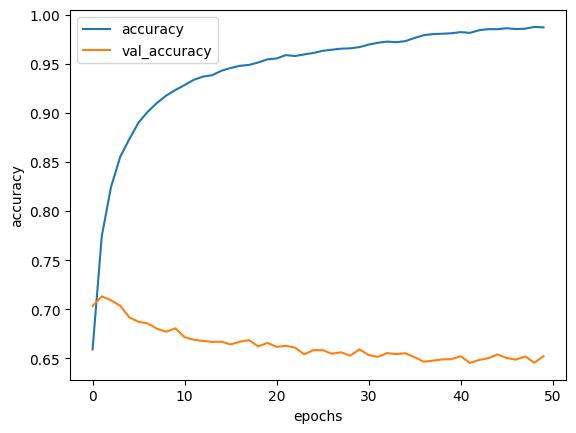

In [143]:
plot_graph(h,'accuracy')


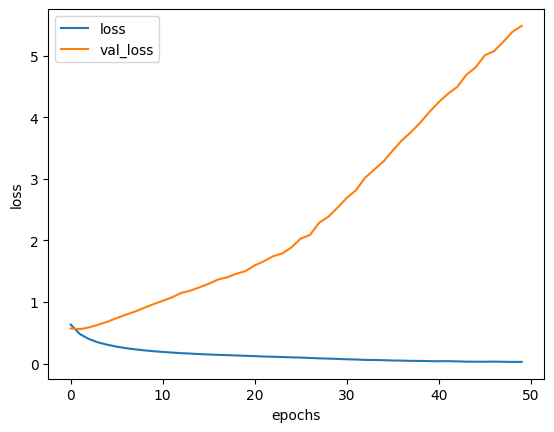

In [144]:
plot_graph(h,'loss')

# Reduire le overfiting

### Le vocab_size

In [145]:
##On peut faire l'explorartion des donnes avec pd pour trouver un compromis du vocab_size. ici on prend 29.000

In [146]:

tokenizer = Tokenizer(num_words=29000, oov_token="<OVV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded =pad_sequences(training_sequences,padding='post',maxlen=20,truncating='post')

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded =pad_sequences(test_sequences,padding='post',maxlen=20,truncating='post')

In [150]:
model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Embedding(49000,20),
            tf.keras.layers.GlobalAveragePooling1D(),##cela fait le moyenne des embeding pour cahque phrase
            
            ##Denses
            tf.keras.layers.Dense(64,activation='relu'),
             tf.keras.layers.Dropout(0.6),
            tf.keras.layers.Dense(1,activation='sigmoid'),
            
        ])

In [151]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h=model.fit(training_padded, training_labels,epochs=50,validation_data=(test_padded,test_labels))

Epoch 1/50
625/625 [==============================] - 15s 23ms/step - loss: 0.6368 - accuracy: 0.6414 - val_loss: 0.5664 - val_accuracy: 0.7036
Epoch 2/50
625/625 [==============================] - 14s 23ms/step - loss: 0.4812 - accuracy: 0.7771 - val_loss: 0.5565 - val_accuracy: 0.7064
Epoch 3/50
625/625 [==============================] - 15s 23ms/step - loss: 0.3887 - accuracy: 0.8353 - val_loss: 0.5935 - val_accuracy: 0.7072
Epoch 4/50
625/625 [==============================] - 14s 23ms/step - loss: 0.3263 - accuracy: 0.8702 - val_loss: 0.6424 - val_accuracy: 0.6986
Epoch 5/50
625/625 [==============================] - 14s 23ms/step - loss: 0.2773 - accuracy: 0.8925 - val_loss: 0.7100 - val_accuracy: 0.6990
Epoch 6/50
625/625 [==============================] - 16s 25ms/step - loss: 0.2360 - accuracy: 0.9075 - val_loss: 0.8132 - val_accuracy: 0.6940
Epoch 7/50
625/625 [==============================] - 15s 23ms/step - loss: 0.2067 - accuracy: 0.9199 - val_loss: 0.9226 - val_accuracy:

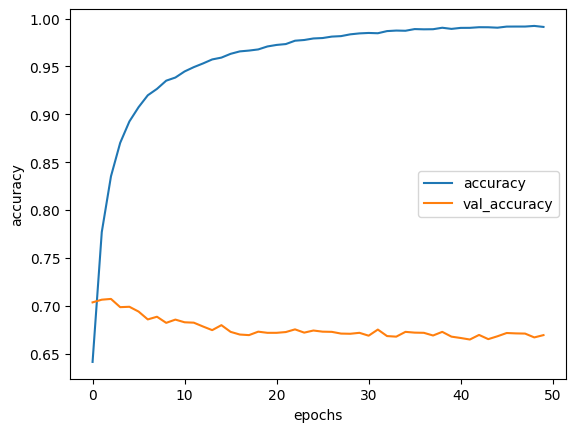

In [153]:
plot_graph(h,'accuracy')

##modifions le embedding dims

## modifions le embedding dims

In [154]:
embedding_dims =np.power(29000,1/4)

In [155]:
embedding_dims

13.049669101523763

In [156]:
model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Embedding(29000,13),
            tf.keras.layers.GlobalAveragePooling1D(),##cela fait le moyenne des embeding pour cahque phrase
            
            ##Denses
            tf.keras.layers.Dense(64,activation='relu'),
             tf.keras.layers.Dropout(0.6),
            tf.keras.layers.Dense(1,activation='sigmoid'),
            
        ])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h=model.fit(training_padded, training_labels,epochs=50,validation_data=(test_padded,test_labels))

Epoch 1/50
625/625 [==============================] - 7s 10ms/step - loss: 0.6439 - accuracy: 0.6273 - val_loss: 0.5707 - val_accuracy: 0.7016
Epoch 2/50
625/625 [==============================] - 6s 10ms/step - loss: 0.4919 - accuracy: 0.7702 - val_loss: 0.5581 - val_accuracy: 0.7124
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 0.4013 - accuracy: 0.8274 - val_loss: 0.5896 - val_accuracy: 0.7104
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 0.3400 - accuracy: 0.8607 - val_loss: 0.6330 - val_accuracy: 0.7056
Epoch 5/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2941 - accuracy: 0.8875 - val_loss: 0.6956 - val_accuracy: 0.7022
Epoch 6/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2594 - accuracy: 0.9046 - val_loss: 0.7597 - val_accuracy: 0.6938
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2311 - accuracy: 0.9195 - val_loss: 0.8350 - val_accuracy: 0.6866


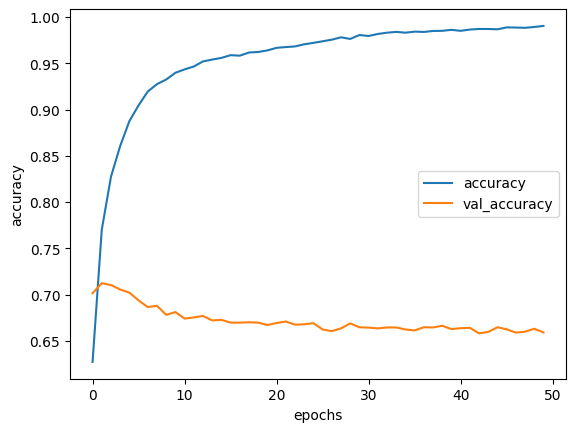

In [157]:
plot_graph(h,'accuracy')